Đang cài đặt thư viện Ultralytics...

Đã cài đặt xong!
Đã import các thư viện.
Đang tải mô hình YOLOv10n...
Đã tải mô hình thành công.

Bây giờ, hãy chọn 1 ảnh từ máy tính của bạn...


Saving IMG_6488.jpg to IMG_6488.jpg
Đã tải lên ảnh có tên: IMG_6488.jpg
Đang chạy nhận diện trên ảnh: IMG_6488.jpg...

image 1/1 /content/IMG_6488.jpg: 640x448 1 person, 159.8ms
Speed: 4.2ms preprocess, 159.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 448)
Đã nhận diện xong!
Tìm thấy 1 đối tượng trong ảnh.
Đang hiển thị kết quả...


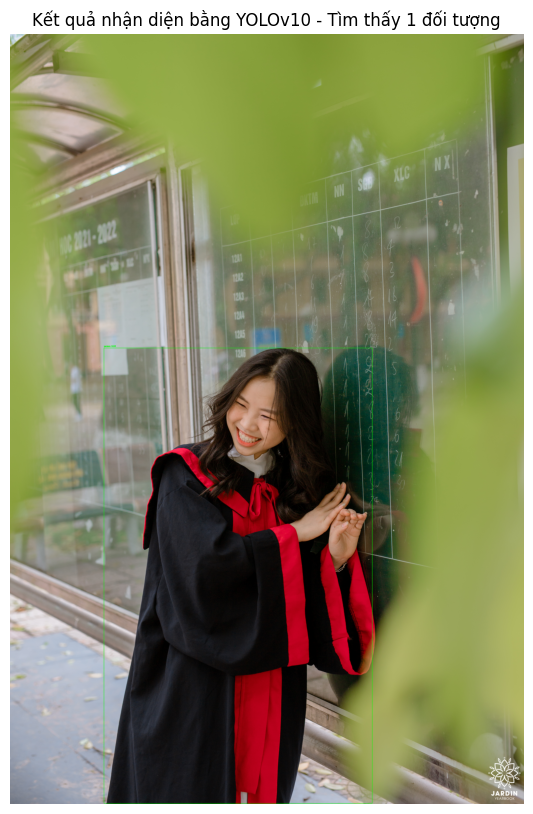

In [4]:

!pip install ultralytics
from ultralytics import YOLO
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import os
print("Đang tải mô hình YOLOv10n...")
model = YOLO('yolov10n.pt')
print("Đã tải mô hình thành công.")
uploaded = files.upload()
# Kiểm tra ảnh
if len(uploaded.keys()) == 0:
    print("Lỗi: Bạn chưa tải ảnh nào lên!")
else:
    # Lấy tên của file ảnh đầu tiên bạn tải lên
    image_filename = list(uploaded.keys())[0]
    print(f"Đã tải lên ảnh có tên: {image_filename}")

    # --- Bước 5: Chạy mô hình để nhận diện ---
    print(f"Đang chạy nhận diện trên ảnh: {image_filename}...")

    # .predict() là hàm để chạy nhận diện
    # 'conf=0.25' nghĩa là chỉ giữ lại các phát hiện có độ tự tin trên 25%
    results = model.predict(source=image_filename, conf=0.25)

    print("Đã nhận diện xong!")

    # --- Bước 6: Hiển thị kết quả ---
    # 'results' là một danh sách. Chúng ta lấy kết quả đầu tiên
    result = results[0]

    # Lấy ảnh gốc
    img = cv2.imread(image_filename)

    # Lấy các "bounding box" (khung viền)
    boxes = result.boxes

    # Lấy tên các lớp (class names) mà mô hình biết
    names = result.names

    print(f"Tìm thấy {len(boxes)} đối tượng trong ảnh.")

    # Lặp qua từng đối tượng tìm được để vẽ lên ảnh
    for box in boxes:
        # Lấy tọa độ (x1, y1, x2, y2)
        x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]

        # Lấy độ tự tin (confidence)
        conf = float(box.conf[0])

        # Lấy ID của lớp (ví dụ: 0 là 'person')
        cls = int(box.cls[0])

        # Lấy tên của lớp đó
        label = f"{names[cls]} {conf:.2f}" # Ví dụ: "person 0.95"

        # Vẽ hình chữ nhật
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) # Màu xanh

        # Viết nhãn tên (label)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # Chuyển đổi màu từ BGR (OpenCV) sang RGB (Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 10))
    plt.imshow(img_rgb)
    plt.title(f"Kết quả nhận diện - Tìm thấy {len(boxes)} đối tượng")
    plt.axis("off")
    plt.show()